In [557]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols

# Import the data

In [558]:
df = pd.read_csv('Elec.csv')

In [559]:
df.head()

,Unnamed: 0,Election Year,District Number,District,Constituency No,Constituency,Position,Candidate's Name,Sex,Age,...,PMNSbyTE,CMbyTE,MedbyTE,VehbyTE,CWbyTE,OEbyTE,PoCCbyTE,OFbyTF,PFbyTF,APFbyTF
0,1,2020,30,Samastipur,139,Rosera,1,BIRENDRA KUMAR,MALE,44,...,0.232929,0.097514,0.043050,0.301672,0.324835,0.000000,0.000000,0.000000,1.000000,0.000000
1,2,2020,37,Vaishali,129,Mahnar,1,Bina singh,FEMALE,60,...,0.103964,0.004118,0.686728,0.157134,0.024355,0.000000,0.000000,0.139344,0.000000,0.860656
2,3,2020,12,Gopalganj,102,Kuchaikote,1,AMRENDRA KUMAR PANDEY,MALE,46,...,0.901407,0.018387,0.000000,0.070564,0.000000,0.000719,0.003775,0.266400,0.666001,0.067599
3,4,2020,16,Katihar,69,Korha,4,LALIT KUMAR,MALE,40,...,0.016834,0.421711,0.000000,0.342062,0.100299,0.009430,0.059861,0.534947,0.000000,0.465053
4,5,2020,35,siwan,107,darauli,4,shiv kumar manjhi,MALE,60,...,0.000000,0.198023,0.000000,0.468694,0.118224,0.176045,0.039014,0.047511,0.000000,0.952489


In [560]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Election Year                 1131 non-null   int64  
 1   District Number               1131 non-null   int64  
 2   District                      1131 non-null   object 
 3   Constituency No               1131 non-null   int64  
 4   Constituency                  1131 non-null   object 
 5   Position                      1131 non-null   int64  
 6   Candidate's Name              1131 non-null   object 
 7   Sex                           1131 non-null   object 
 8   Age                           1131 non-null   int64  
 9   Category                      1131 non-null   object 
 10  Party                         1131 non-null   object 
 11  Total Votes                   1131 non-null   int64  
 12  Votes Polled (%)              1131 non-null   float64
 13  Pub

In [562]:
df = df.assign(CostprVote = df['Total_Exp'] /df['Total Votes'])

df.head()

,Election Year,District Number,District,Constituency No,Constituency,Position,Candidate's Name,Sex,Age,Category,...,CMbyTE,MedbyTE,VehbyTE,CWbyTE,OEbyTE,PoCCbyTE,OFbyTF,PFbyTF,APFbyTF,CostprVote
0,2020,30,Samastipur,139,Rosera,1,BIRENDRA KUMAR,MALE,44,SC,...,0.097514,0.043050,0.301672,0.324835,0.000000,0.000000,0.000000,1.000000,0.000000,17.122506
1,2020,37,Vaishali,129,Mahnar,1,Bina singh,FEMALE,60,GENERAL,...,0.004118,0.686728,0.157134,0.024355,0.000000,0.000000,0.139344,0.000000,0.860656,27.541242
2,2020,12,Gopalganj,102,Kuchaikote,1,AMRENDRA KUMAR PANDEY,MALE,46,GENERAL,...,0.018387,0.000000,0.070564,0.000000,0.000719,0.003775,0.266400,0.666001,0.067599,187.037857
3,2020,16,Katihar,69,Korha,4,LALIT KUMAR,MALE,40,SC,...,0.421711,0.000000,0.342062,0.100299,0.009430,0.059861,0.534947,0.000000,0.465053,293.567643
4,2020,35,siwan,107,darauli,4,shiv kumar manjhi,MALE,60,SC,...,0.198023,0.000000,0.468694,0.118224,0.176045,0.039014,0.047511,0.000000,0.952489,134.689809


# Remove the Outliers by using IQR (Inter Quartile Range) method

In [563]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [564]:

Q1 = np.percentile(df['CostprVote'], 25,interpolation = 'midpoint')
 
Q3 = np.percentile(df['CostprVote'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['CostprVote'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['CostprVote'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (1131, 38)
New Shape:  (1028, 38)


In [565]:
df['Sex'].value_counts()
df = df.loc[df["Sex"] != "THIRD"]
df.shape

(1027, 38)

## Creating Log variables on INR

In [566]:

#PMNSbyTE , PMSbyTE , CMbyTE , MedbyTE , VehbyTE , CWbyTE , OEbyTE  , PFbyTF ,
df['lPMNS'] = np.log(df['Public Meeting Non-Star']+1)
df['lPMS'] = np.log(df['Public Meeting Star']+1)
df['lCM'] = np.log(df['Campaign Material']+1)
df['lM'] = np.log(df['Media']+1)
df['lV'] = np.log(df['Vehicle']+1)
df['lCW'] = np.log(df['Campaign Worker']+1)
df['lOE'] = np.log(df['Other Expenditure']+1)
df['lPoCC'] = np.log(df['Publication of Criminal Case']+1)

#OFbyTF , PFbyTF , APFbyTF
df['lOF'] = np.log(df['Own Fund']+1)
df['lPF'] = np.log(df['Party Fund']+1)
df['lAPF'] = np.log(df['Another Person Fund']+1)

#for votes
df['lVotes'] = np.log(df['Total Votes']+1)

In [567]:
df['MaxExpendIN'] = df[['Public Meeting Non-Star', 'Public Meeting Star', 'Campaign Material', 'Media','Vehicle', 'Campaign Worker', 'Other Expenditure', 'Publication of Criminal Case']].idxmax(axis=1)
df['MaxFundIN'] = df[['Own Fund', 'Party Fund', 'Another Person Fund']].idxmax(axis=1)

In [568]:
df.head()

,Election Year,District Number,District,Constituency No,Constituency,Position,Candidate's Name,Sex,Age,Category,...,lV,lCW,lOE,lPoCC,lOF,lPF,lAPF,lVotes,MaxExpendIN,MaxFundIN
0,2020,30,Samastipur,139,Rosera,1,BIRENDRA KUMAR,MALE,44,SC,...,13.017516,13.091494,0.000000,0.000000,0.000000,14.220976,0.000000,11.375547,Campaign Worker,Party Fund
1,2020,37,Vaishali,129,Mahnar,1,Bina singh,FEMALE,60,GENERAL,...,12.495408,10.631060,0.000000,0.000000,12.409018,0.000000,14.229767,11.030396,Media,Another Person Fund
5,2020,34,Sitamarhi,27,Bajpatti,1,MUKESH KUMAR YADAV,MALE,40,GENERAL,...,13.388874,12.709272,0.000000,12.279272,11.097425,12.826891,14.288585,11.177229,Vehicle,Another Person Fund
6,2020,37,Vaishali,127,raja pakar,1,pratima kumari,FEMALE,44,SC,...,12.709272,12.352741,8.603554,12.266476,10.601772,14.845130,0.000000,10.902280,Vehicle,Party Fund
7,2020,13,Jamui,242,Jhajha,1,DAMODAR RAWAT,MALE,61,GENERAL,...,10.436084,11.675053,12.253905,12.121957,13.531822,13.815512,12.826807,11.251210,Campaign Material,Party Fund


<AxesSubplot:>

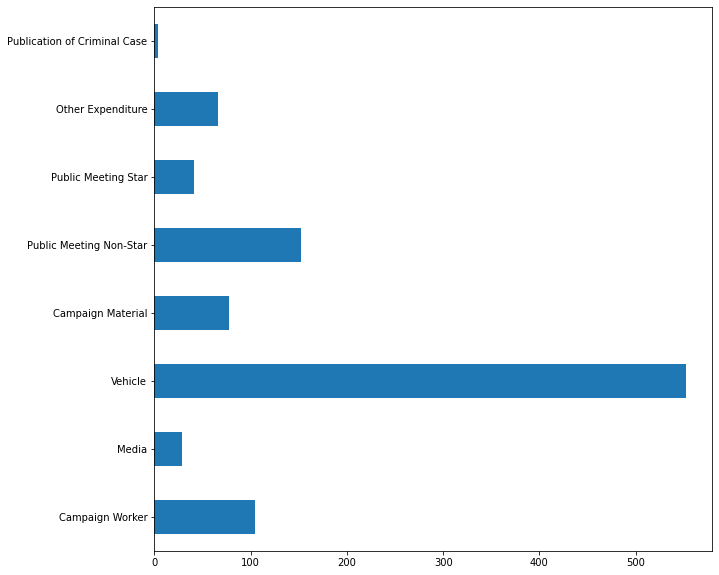

In [569]:
df['MaxExpendIN'].value_counts(sort=False).plot.barh()

Vechile expanse is maximum for maximum numbers of candidates. For more than 500 Individuals

<AxesSubplot:>

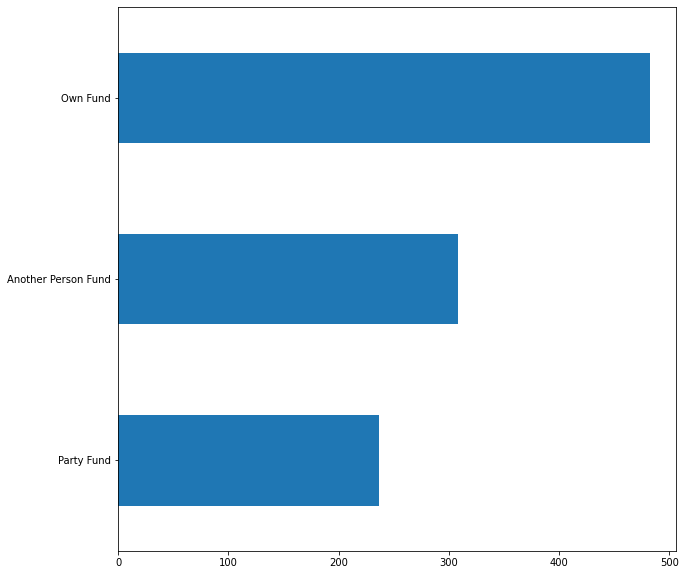

In [570]:
df['MaxFundIN'].value_counts(sort=False).plot.barh()

Fund received from threir party is maximum for maximum numbers of candidates

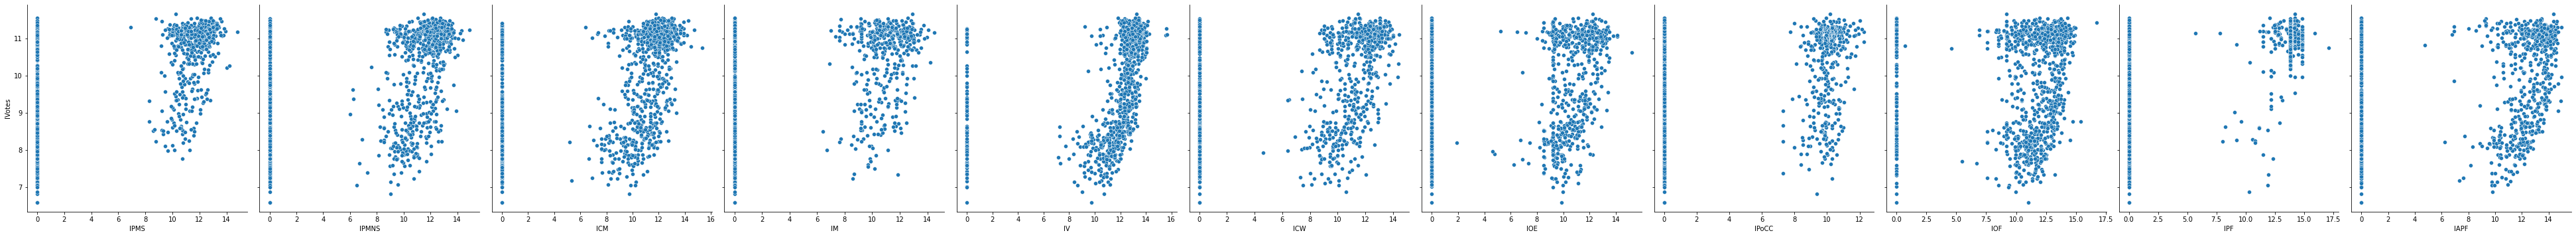

In [571]:
#For all log variables
sns.pairplot(df, x_vars=['lPMS', 'lPMNS', 'lCM', 'lM','lV', 'lCW', 'lOE', 'lPoCC','lOF','lPF','lAPF'], 
             y_vars='lVotes', size=5, aspect=1, kind='scatter')
plt.show()


## Principal Component Analysis (PCA)

In [572]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [573]:
Y = np.array(df['lVotes'])
Y

array([11.37554668, 11.03039571, 11.17722893, ..., 10.7137064 ,
       10.02729684,  9.74014475])

In [574]:
# X_col_names = ['Public Meeting Non-Star', 'Public Meeting Star', 'Campaign Material', 'Media','Vehicle',\
#                'Campaign Worker', 'Other Expenditure','Publication of Criminal Case','Own Fund', \
#                'Party Fund', 'Another Person Fund']
X_col_names = ['lPMS','lPMNS','lCM','lM','lV','lCW','lOE','lPoCC','lOF','lPF','lAPF']
X = np.array(df[X_col_names])
assert Y.shape[0] == X.shape[0]

In [575]:
df[X_col_names].describe()

,lPMS,lPMNS,lCM,lM,lV,lCW,lOE,lPoCC,lOF,lPF,lAPF
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000
mean,5.599299,6.856863,8.145529,4.625577,11.052631,7.134623,6.186504,3.740745,10.168471,4.376677,7.273624
std,5.813118,5.668855,5.109316,5.489484,3.881304,5.608141,5.402261,4.867870,4.392763,6.418016,6.205853
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,11.164591,0.000000,0.000000,0.000000,9.903538,0.000000,0.000000
50%,0.000000,9.959442,10.653747,0.000000,12.496344,9.988426,9.210440,0.000000,11.561725,0.000000,10.778143
75%,11.549937,11.906045,11.867455,10.636023,13.034635,12.112934,11.022760,9.715711,13.003547,13.334460,12.910410
max,14.796793,14.924503,15.317004,14.518680,15.646652,14.461048,15.194281,12.279272,16.724183,17.147715,14.953282


In [576]:
scaler = StandardScaler()

In [577]:
X_scaled = scaler.fit_transform(X)
# Check the data scaling
pd.DataFrame(X_scaled, columns = X_col_names).describe()

,lPMS,lPMNS,lCM,lM,lV,lCW,lOE,lPoCC,lOF,lPF,lAPF
count,1.027000e+03,1.027000e+03,1.027000e+03,1.027000e+03,1.027000e+03,1.027000e+03,1.027000e+03,1.027000e+03,1.027000e+03,1.027000e+03,1.027000e+03
mean,8.302349e-17,9.686074e-17,-1.106980e-16,-6.918624e-17,-8.302349e-17,1.868029e-16,1.383725e-17,-5.534900e-17,-1.522097e-16,-4.151175e-17,-6.226762e-17
std,1.000487e+00,1.000487e+00,1.000487e+00,1.000487e+00,1.000487e+00,1.000487e+00,1.000487e+00,1.000487e+00,1.000487e+00,1.000487e+00,1.000487e+00
min,-9.636871e-01,-1.210157e+00,-1.595027e+00,-8.430357e-01,-2.849047e+00,-1.272810e+00,-1.145727e+00,-7.688306e-01,-2.315952e+00,-6.822683e-01,-1.172630e+00
25%,-9.636871e-01,-1.210157e+00,-1.595027e+00,-8.430357e-01,2.886008e-02,-1.272810e+00,-1.145727e+00,-7.688306e-01,-6.034074e-02,-6.822683e-01,-1.172630e+00
50%,-9.636871e-01,5.475694e-01,4.911500e-01,-8.430357e-01,3.721473e-01,5.091158e-01,5.600266e-01,-7.688306e-01,3.173249e-01,-6.822683e-01,5.649871e-01
75%,1.024156e+00,8.911222e-01,7.288137e-01,1.095435e+00,5.109032e-01,8.881262e-01,8.956643e-01,1.228027e+00,6.457115e-01,1.396405e+00,9.087441e-01
max,1.582967e+00,1.423845e+00,1.404292e+00,1.803070e+00,1.184205e+00,1.307027e+00,1.668221e+00,1.754913e+00,1.493116e+00,1.990843e+00,1.238089e+00


In [578]:
pca = PCA(n_components=10)
pca.fit(X)
X_PCA = pca.transform(X_scaled)

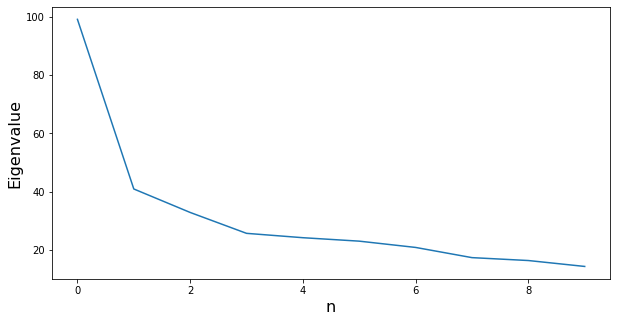

In [579]:
plt.figure(figsize=(10,5))
plt.plot(pca.explained_variance_)
plt.xlabel('n', fontsize =16)
plt.ylabel('Eigenvalue', fontsize=16)
plt.show()

## This graph explain that about 7 variables among them could explain the output variable log(Total Votes) which is lVotes

## Now I'm using recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features

In [580]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# create pipeline
for i in range(1,X_scaled.shape[1]+1):
    rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
    model = DecisionTreeRegressor()
    pipeline = Pipeline(steps=[('s',rfe),('m',model)])
    # evaluate model
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(pipeline, X_scaled, Y, scoring='neg_mean_squared_error', cv=cv, n_jobs=1, error_score='raise')
    # report performancce
    print('num features: %2d, MSE: %.3f (%.3f)' % (i, np.mean(-n_scores), np.std(n_scores)))

num features:  1, MSE: 1.373 (0.235)
num features:  2, MSE: 1.464 (0.194)
num features:  3, MSE: 1.031 (0.176)
num features:  4, MSE: 0.977 (0.180)
num features:  5, MSE: 0.959 (0.160)
num features:  6, MSE: 0.905 (0.176)
num features:  7, MSE: 0.871 (0.176)
num features:  8, MSE: 0.883 (0.154)
num features:  9, MSE: 0.882 (0.154)
num features: 10, MSE: 0.897 (0.149)
num features: 11, MSE: 0.875 (0.169)


In [581]:
rfe.fit(X_scaled, Y)
# summarize all features
for i in range(X_scaled.shape[1]):
    print('Column: %2d, Selected: %5s, Rank: %.3f, Column Name: %s,' % \
          (i,rfe.support_[i], rfe.ranking_[i], X_col_names[i] ))

Column:  0, Selected:  True, Rank: 1.000, Column Name: lPMS,
Column:  1, Selected:  True, Rank: 1.000, Column Name: lPMNS,
Column:  2, Selected:  True, Rank: 1.000, Column Name: lCM,
Column:  3, Selected:  True, Rank: 1.000, Column Name: lM,
Column:  4, Selected:  True, Rank: 1.000, Column Name: lV,
Column:  5, Selected:  True, Rank: 1.000, Column Name: lCW,
Column:  6, Selected:  True, Rank: 1.000, Column Name: lOE,
Column:  7, Selected:  True, Rank: 1.000, Column Name: lPoCC,
Column:  8, Selected:  True, Rank: 1.000, Column Name: lOF,
Column:  9, Selected:  True, Rank: 1.000, Column Name: lPF,
Column: 10, Selected:  True, Rank: 1.000, Column Name: lAPF,


In [582]:
df[X_col_names].describe()

,lPMS,lPMNS,lCM,lM,lV,lCW,lOE,lPoCC,lOF,lPF,lAPF
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000
mean,5.599299,6.856863,8.145529,4.625577,11.052631,7.134623,6.186504,3.740745,10.168471,4.376677,7.273624
std,5.813118,5.668855,5.109316,5.489484,3.881304,5.608141,5.402261,4.867870,4.392763,6.418016,6.205853
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,11.164591,0.000000,0.000000,0.000000,9.903538,0.000000,0.000000
50%,0.000000,9.959442,10.653747,0.000000,12.496344,9.988426,9.210440,0.000000,11.561725,0.000000,10.778143
75%,11.549937,11.906045,11.867455,10.636023,13.034635,12.112934,11.022760,9.715711,13.003547,13.334460,12.910410
max,14.796793,14.924503,15.317004,14.518680,15.646652,14.461048,15.194281,12.279272,16.724183,17.147715,14.953282


In [583]:
df = df[['Position','Sex','lPMS','lPMNS','lM','lV','lCW','lAPF','lVotes']]
#extra ,'Category', 'lCW','lOE','lPoCC','lOF','lPF',
df.head()
# dummies = pd.get_dummies(df['Position','Sex'])
# #.rename(columns=lambda x: 'Position_' + str(x))
# df = pd.concat([df, dummies], axis=1)
# df = df.drop(['Position','Sex'], inplace=True, axis=1)

,Position,Sex,lPMS,lPMNS,lM,lV,lCW,lAPF,lVotes
0,1,MALE,0.000000,12.758908,11.070553,13.017516,13.091494,0.000000,11.375547
1,1,FEMALE,10.603883,12.082356,13.970248,12.495408,10.631060,14.229767,11.030396
5,1,MALE,12.145446,11.421862,0.000000,13.388874,12.709272,14.288585,11.177229
6,1,FEMALE,0.000000,10.533455,12.485283,12.709272,12.352741,0.000000,10.902280
7,1,MALE,0.000000,11.099544,9.392745,10.436084,11.675053,12.826807,11.251210


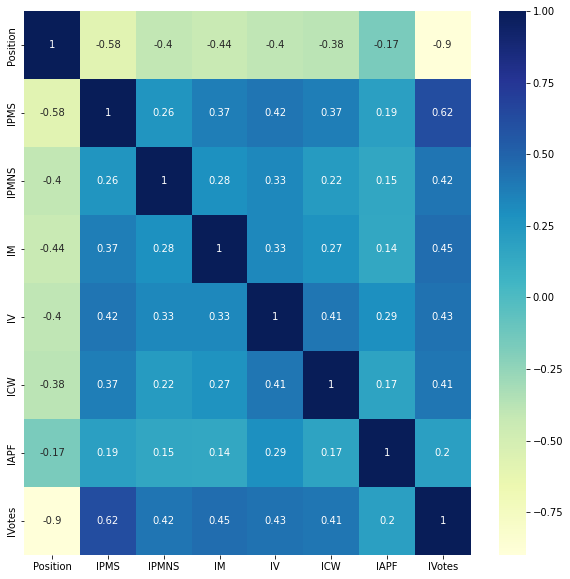

In [584]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.rcParams["figure.figsize"] = (10,10)


# Lets go with all log Variables

In [601]:
#Model(1) to try with all log variables (R-squared:	0.185) also including Dummy variables (R-squared:	0.527)
#'lPMS', 'lPMNS', 'lCM', 'lM','lV', 'lCW', 'lOE', 'lPoCC','lOF','lPF','lAPF'
fit = ols('lVotes ~  C(Position)+C(Sex)+ lPMS + lPMNS  + lM + lV + lCW + lAPF', data=df).fit()
#Removing all these variables to reduce multicollinearity before that R-Square is (0.901)
# C(df["District Number"]) +C(Party) + C(Category) + lCM + lPoCC + lOE + lOF + lPF 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lVotes   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     582.6
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:52:45   Log-Likelihood:                -754.05
No. Observations:                1027   AIC:                             1532.
Df Residuals:                    1015   BIC:                             1591.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.5041      0.087    120.876      0.000      10.334      10.675
C(Position)[T.2]    -0.1926      0.048     -4.030      0.000      -0.286      -0.099
C(Position)[T.3]    -1.5437      0.053    -29.397      0.000      -1.647      -1.441
C(Position)[T.4]    -2.3678      0.060    -39.360      0.000      -2.486      -2.250
C(Position)[T.5]    -2.7657      0.065    -42.528      0.000      -2.893      -2.638
C(Sex)[T.MALE]       0.1064      0.049      2.157      0.031       0.010       0.203
lPMS                 0.0215      0.004      6.043      0.000       0.014       0.028
lPMNS                0.0077      0.003      2.453      0.014       0.002       0.014
lM                   0.0116      0.003      3.481      0.001       0.005       0.018
lV                   0.0097      0.005      1.948      0.052   -6.89e-05       0.019
lCW                  0.0061      0.003      1.867      0.062      -0.000       0.012
lAPF                 0.0063      0.003      2.339      0.020       0.001       0.012
==============================================================================
Omnibus:                       49.218   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.281
Skew:                          -0.263   Prob(JB):                     2.52e-25
Kurtosis:                       4.540   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Alternate way for the same Model 

In [586]:
trainDfDummies = pd.get_dummies(df, columns=['Position', 'Sex'])

In [587]:
trainDfDummies.head()

,lPMS,lPMNS,lM,lV,lCW,lAPF,lVotes,Position_1,Position_2,Position_3,Position_4,Position_5,Sex_FEMALE,Sex_MALE
0,0.000000,12.758908,11.070553,13.017516,13.091494,0.000000,11.375547,1,0,0,0,0,0,1
1,10.603883,12.082356,13.970248,12.495408,10.631060,14.229767,11.030396,1,0,0,0,0,1,0
5,12.145446,11.421862,0.000000,13.388874,12.709272,14.288585,11.177229,1,0,0,0,0,0,1
6,0.000000,10.533455,12.485283,12.709272,12.352741,0.000000,10.902280,1,0,0,0,0,1,0
7,0.000000,11.099544,9.392745,10.436084,11.675053,12.826807,11.251210,1,0,0,0,0,0,1


In [588]:
lm = LinearRegression()
#'lPMS','lPMNS','lM','lV','lCW','lPoCC','lAPF'

In [589]:
#model (1) proportional model only for expense
Z = trainDfDummies[['Position_2','Position_3','Position_4','Position_5','Sex_MALE','lPMS','lPMNS','lM','lV','lCW','lAPF']]
#,'lPoCC', 'Position_1',,'Sex_FEMALE'

In [590]:
lm.fit(Z, df['lVotes'])

LinearRegression()

In [591]:
lm.intercept_

10.504132044476796

In [592]:
lm.coef_ 

array([-0.19261062, -1.5437016 , -2.36783134, -2.76571878,  0.10636454,
        0.02146936,  0.00772646,  0.01157322,  0.00970858,  0.00606901,
        0.00630246])

This means that the Multiple Linear Equation is \
    log(Votes) = 10.504132044476796
-0.19261062 x Position_2
-1.5437016 x Position_3
-2.36783134 x Position_4
-2.76571878 x Position_5
+0.10636454 x Sex_MALE
+0.02146936 x lPMS 
+0.00772646 x lPMNS 
+0.01157322 x lM 
+0.00970858 x lV 
+0.00606901 x lCW 
+0.00630246 x lAPF

In [593]:
Y_hat = lm.predict(Z) #for the distribution of the fitted values

One way to look at the fit of the model is by looking at the distribution plot: We can look at
the distribution of the fitted values that result from the model and compare it to the
distribution of the actual values. 

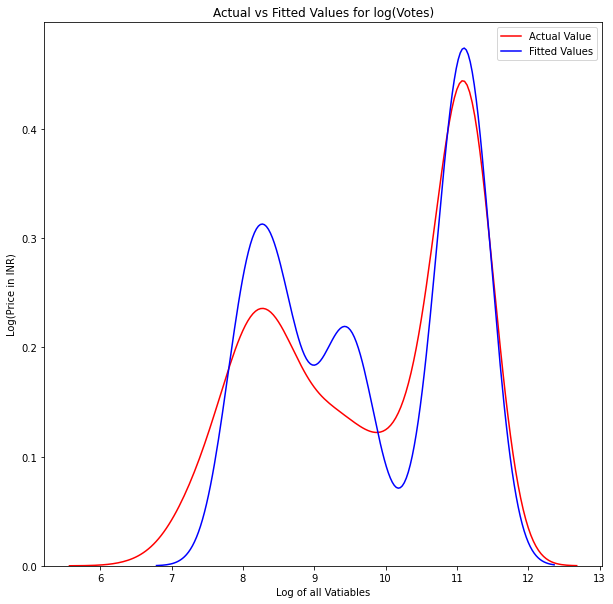

In [594]:
plt.figure(figsize=(10, 10))
ax1 = sns.distplot(df['lVotes'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1) 
plt.title('Actual vs Fitted Values for log(Votes)')
plt.xlabel('Log of all Vatiables')
plt.ylabel('Log(Price in INR)')
plt.legend()
plt.show()
#plt.close()

Comments:\
=> We can see that the fitted values are not reasonably close to the actual values, since the 
two distributions is close enough.\
=> However, there is definitely some room for improvement.\
=> This Multiple Regression is a quite good fit.

CALCULATE THE R2 FOR MR

In [595]:
print('The R-square is: ', lm.score(Z, df['lVotes'])) #for R square

The R-square is:  0.8632665694878572


86.33% data is exlained with this model. Which is quite good feet Model

CALCULATE THE MSE FOR MR

In [596]:
Y_predict_multifit = lm.predict(Z)

In [597]:
print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(df['lVotes'], Y_predict_multifit)) 

The mean square error of price and predicted value using multifit is:  0.2542514411865481


# Rough Work for Tried and Failed Model

In [598]:
#Model(2) to try all ratio variables
fit = ols('CostprVote ~  PMNSbyTE + CMbyTE + MedbyTE + VehbyTE + CWbyTE + OEbyTE  + PFbyTF', data=df).fit()
#Removing all large std error variables before that R-Square was 0.156 
# PMSbyTE	6.8635	9.504 , OFbyTF	0.7227	4.472, PoCCbyTE	26.7982	17.308, APFbyTF	5.1520	2.617
fit.summary()

PatsyError: Error evaluating factor: NameError: name 'OEbyTE' is not defined
    CostprVote ~  PMNSbyTE + CMbyTE + MedbyTE + VehbyTE + CWbyTE + OEbyTE  + PFbyTF
                                                                   ^^^^^^

In [599]:
# #Model(3) to try according to correlation matrics whose corelation is >10%
# # and by using dummy variables 
# #from statsmodels.formula.api import ols
# #from scipy.misc import factorial

# fit = ols('CostprVote ~ df["Votes Polled (%)"] + df["Campaign Material"] + df["Public Meeting Star"]+ Total_Exp ', data=df).fit()
# #C(Position)+    C(Sex) +
# fit.summary()

In [263]:
# min_CostprVote = df['CostprVote'].min(axis=0)
# max_CostprVote = df['CostprVote'].max(axis=0)

# df = df.assign(UnitCostprVote = (df['CostprVote'] - min_CostprVote )/ (max_CostprVote - min_CostprVote))
# df.head()

%conda install -c conda-forge statsmodels

In [264]:
#from statsmodels.formula.api import ols

In [265]:
# #Scatter plot with all INR data
# sns.pairplot(df, x_vars=['Public Meeting Star', 'Public Meeting Non-Star', 'Campaign Material', 'Media','Vehicle', 'Campaign Worker', 'Other Expenditure', 'Publication of Criminal Case'], 
#              y_vars='CostprVote', size=5, aspect=1, kind='scatter')
# plt.show()

In [266]:
# #Expanse ratios
# sns.pairplot(df, x_vars=['PMSbyTE', 'PMNSbyTE', 'CMbyTE', 'MedbyTE','VehbyTE', 'CWbyTE', 'OEbyTE', 'PoCCbyTE'], 
#              y_vars='CostprVote', size=5, aspect=1, kind='scatter')
# plt.show()

In [520]:
# #For fund
# sns.pairplot(df, x_vars=['OFbyTF' , 'PFbyTF' , 'APFbyTF'], 
#              y_vars='CostprVote', size=5, aspect=1, kind='scatter')
# plt.show()

\begin{equation}
\chi^2=\Sigma\frac{(O-E)^2}{E} \\
\text{where O is the actual value and E is the expected value.}
\end{equation}